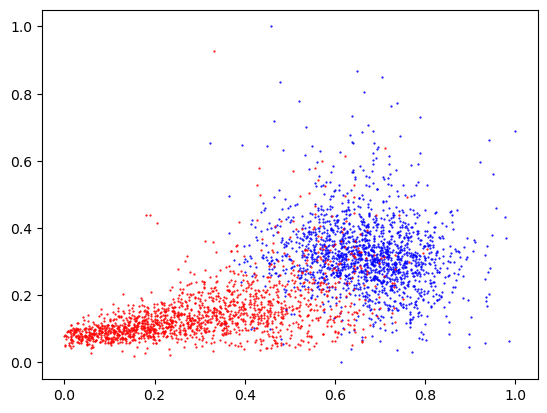

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = np.load("pulsar_features.npy")
y = np.load("pulsar_labels.npy")

negInd = y == -1
posInd = y == 1
plt.scatter(x[0, negInd[0, :]], x[1, negInd[0, :]], color='b', s=0.3)
plt.scatter(x[0, posInd[0, :]], x[1, posInd[0, :]], color='r', s=0.3)
plt.figure(1)
plt.show()

In [2]:
lambda_val = 0.001
max_iterations = 10

w = np.zeros(2)
b = 0.0

objective_values = []

In [3]:
for iteration in range(1, max_iterations + 1): # don't want to divide by 0
    step_size = 100.0 / iteration

    # sum each subgradient
    subgrad_w = np.zeros(2)
    subgrad_b = 0.0
    for i in range(y.shape[1]):
        margin = y[:, i] * (np.dot(x[:, i], w) + b)
        if margin < 1:
            subgrad_w += -y[:, i] * x[:, i]
            subgrad_b += -y[:, i]

    # regularization term for bothe margin < 1 and margin >= 1
    subgrad_w /= y.shape[1]
    subgrad_b /= y.shape[1]
    subgrad_w += lambda_val * w

    w -= step_size * subgrad_w
    b -= step_size * subgrad_b


    hinge_loss = np.maximum(0, 1 - y * (x.T.dot(w) + b))
    objective_value = np.mean(hinge_loss) + 0.5 * lambda_val * (np.linalg.norm(w, 2)**2)
    objective_values.append(objective_value)

Learned hyperplane parameters:
w = [-17.81627138  -9.11707611]
b = [12.0680196]
The margin =  4.713532755725594e-05
The minimun objective value = 0.4498841370611548


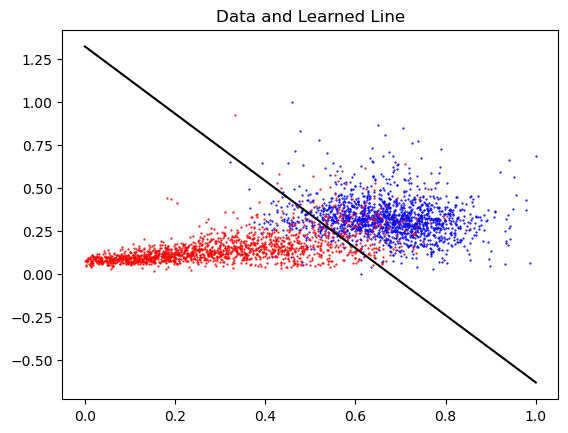

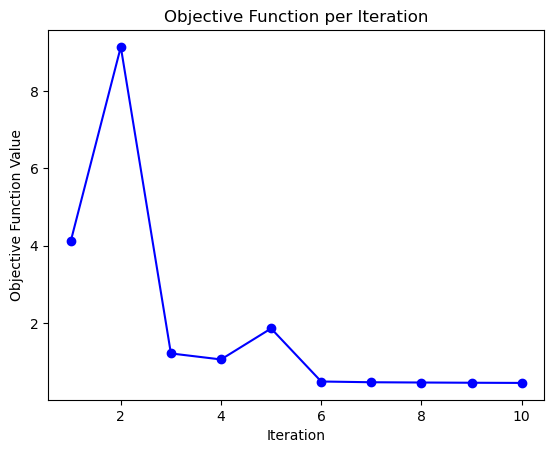

In [4]:
print("Learned hyperplane parameters:")
print("w =", w)
print("b =", b)


margin = np.min(abs((x.T.dot(w) + b) / np.linalg.norm(w, 2)))
print("The margin = ", margin)


min_objective_value = min(objective_values)
print("The minimun objective value =", min_objective_value)

# Plot the data and the learned line
plt.figure(1)
plt.scatter(x[0, negInd[0, :]], x[1, negInd[0, :]], color='b', s=0.3)
plt.scatter(x[0, posInd[0, :]], x[1, posInd[0, :]], color='r', s=0.3)
x_plot = np.linspace(0, 1, 2)
y_plot = ((-w[0]) * x_plot - b) / w[1]
plt.plot(x_plot, y_plot, 'k-')
plt.title("Data and Learned Line")

# Plot the objective function as a function of iteration number
plt.figure(2)
plt.plot(range(1, max_iterations + 1), objective_values, 'bo-')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Objective Function per Iteration")

plt.show()

# Part 2 stochastic gradient descent

In [5]:
lambda_val = 0.001
max_iterations = 10

w = np.zeros(2)
b = 0.0

objective_values = []

n_passes = 10

In [6]:
permutation = np.random.permutation(10)
print(permutation)
x1 = y[:, permutation]
x1.shape

[2 8 4 9 1 6 7 3 0 5]


(1, 10)

In [7]:
for iteration in range(0, max_iterations): # don't want to divide by 0
    permutation = np.random.permutation(y.shape[1])
    x_shuffle = x[:, permutation]
    y_shuffle = y[:, permutation]
    for j in range(y.shape[1]):
        step_size = 100.0 / (iteration * y.shape[1] + (j+1))
        subgrad_w = np.zeros(2)
        subgrad_b = 0.0
        # take 10 data per time, and do 10n times

        margin = y_shuffle[:, j] * (np.dot(x_shuffle[:, j], w) + b)
        if margin < 1:
            subgrad_w += -y_shuffle[:, j] * x_shuffle[:, j]
            subgrad_b += -y_shuffle[:, j]

    # regularization term for bothe margin < 1 and margin >= 1
        subgrad_w += lambda_val * w

        w -= step_size * subgrad_w
        b -= step_size * subgrad_b


    hinge_loss = np.maximum(0, 1 - y * (x.T.dot(w) + b))
    objective_value = np.mean(hinge_loss) + 0.5 * lambda_val * (np.linalg.norm(w, 2)**2)
    objective_values.append(objective_value)

Learned hyperplane parameters:
w = [-19.08784073  -9.69244475]
b = [12.97706403]
The margin =  8.239383798670525e-05
The minimun objective value = 0.4860044411801069


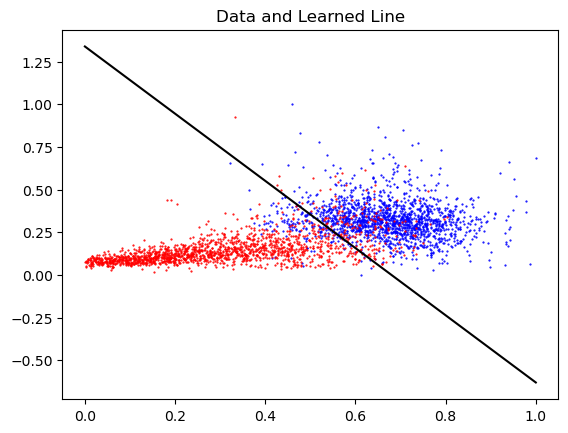

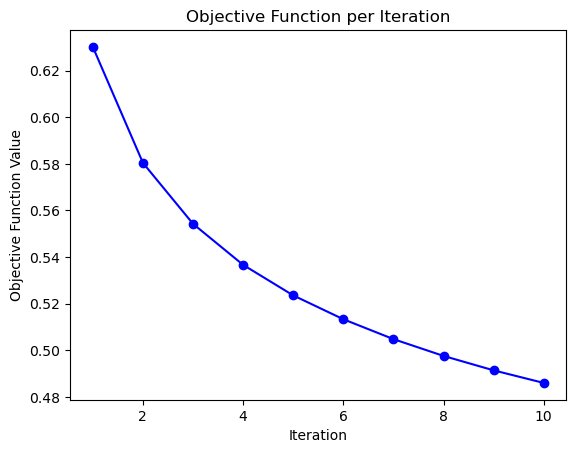

In [8]:
print("Learned hyperplane parameters:")
print("w =", w)
print("b =", b)


margin = np.min(abs((x.T.dot(w) + b) / np.linalg.norm(w, 2)))
print("The margin = ", margin)


min_objective_value = min(objective_values)
print("The minimun objective value =", min_objective_value)

# Plot the data and the learned line
plt.figure(1)
plt.scatter(x[0, negInd[0, :]], x[1, negInd[0, :]], color='b', s=0.3)
plt.scatter(x[0, posInd[0, :]], x[1, posInd[0, :]], color='r', s=0.3)
x_plot = np.linspace(0, 1, 2)
y_plot = ((-w[0]) * x_plot - b) / w[1]
plt.plot(x_plot, y_plot, 'k-')
plt.title("Data and Learned Line")

# Plot the objective function as a function of iteration number
plt.figure(2)
plt.plot(range(1, max_iterations + 1), objective_values, 'bo-')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Objective Function per Iteration")

plt.show()